IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
# Download required resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [5]:
# Load the 20th-Century Text Data
with open("Key_Events_20th_Century.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [7]:
# Tokenize the Text into Words
words = word_tokenize(raw_text)

<AxesSubplot: title={'center': 'Top 10 Most Common Words (Raw)'}, xlabel='Samples', ylabel='Counts'>

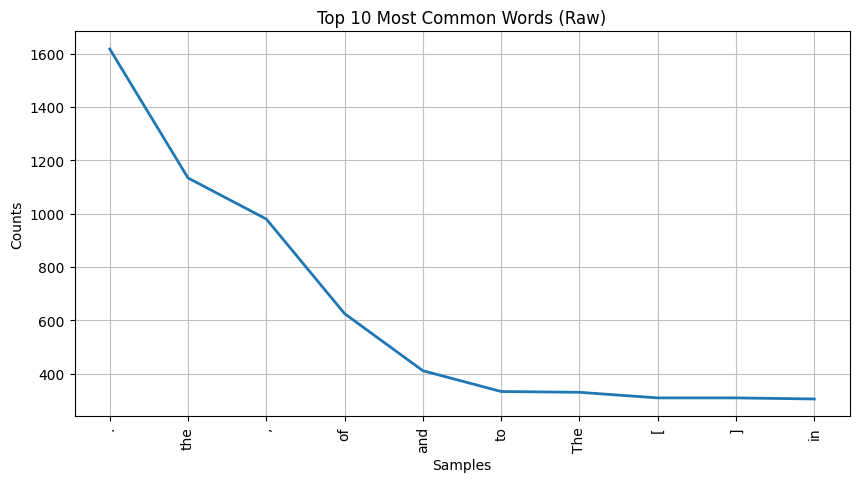

In [9]:
# Create a Frequency Distribution of All Words
fdist = nltk.FreqDist(words)
plt.figure(figsize=(10, 5))
fdist.plot(10, title="Top 10 Most Common Words (Raw)")

<AxesSubplot: title={'center': 'Top 10 Words After Removing Stop Words'}, xlabel='Samples', ylabel='Counts'>

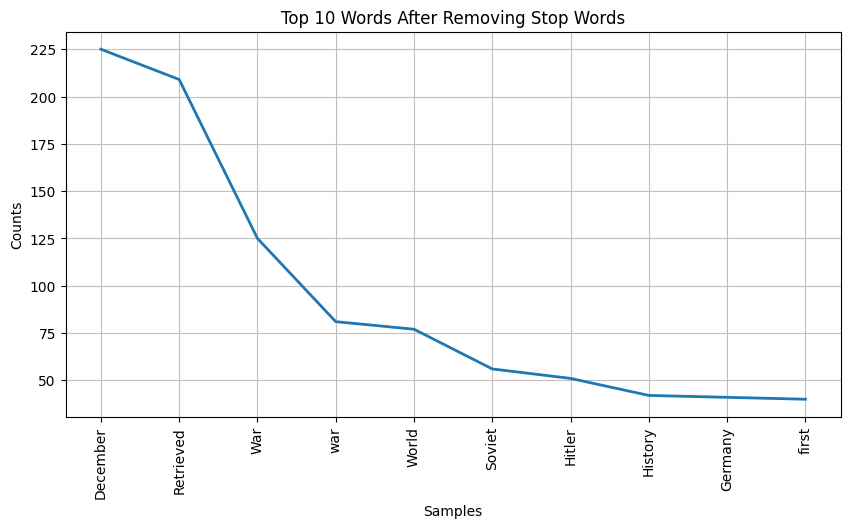

In [11]:
# Remove Stop Words and Punctuation, Then Re-Plot
stop_words = set(stopwords.words("english"))
filtered_words = [w for w in words if w.isalpha() and w.lower() not in stop_words]
fdist_filtered = nltk.FreqDist(filtered_words)
plt.figure(figsize=(10, 5))
fdist_filtered.plot(10, title="Top 10 Words After Removing Stop Words")


After removing stop words, the plot reveals more meaningful content words instead of common English connectors.

In [14]:
# POS Tagging with TextBlob
text_blob = TextBlob(' '.join(filtered_words))
pos_tags = text_blob.tags

In [16]:
# Create POS Frequency DataFrame and Bar Plot
pos_df = pd.DataFrame(pos_tags, columns=["word", "pos"])
pos_grouped = pos_df.groupby("pos").count().reset_index().sort_values("word", ascending=False)
top20_pos = pos_grouped.nlargest(20, "word")

Text(0.5, 1.0, 'Top 20 POS Tags')

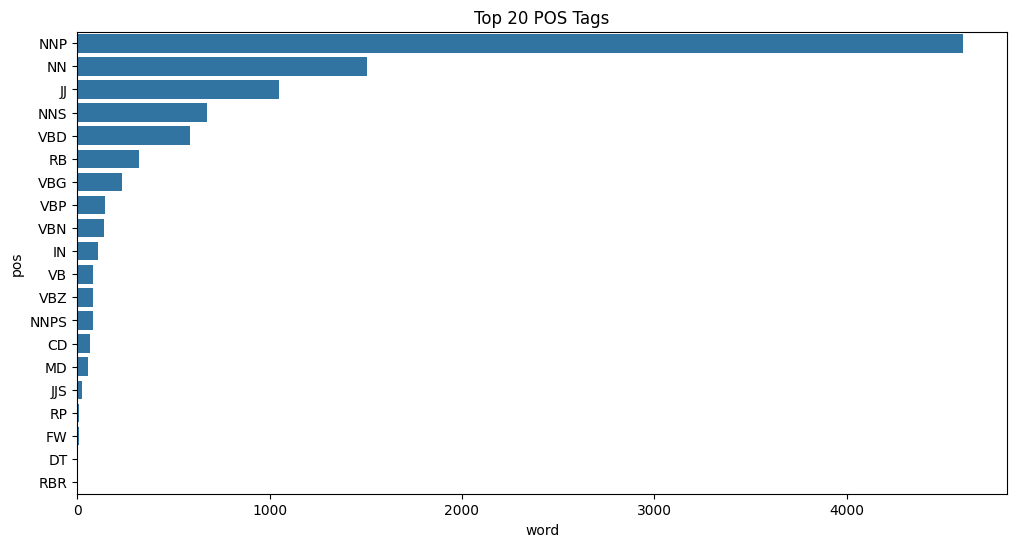

In [18]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top20_pos, x="word", y="pos").set_title("Top 20 POS Tags")

In [20]:
# Separate POS Plots for Nouns, Verbs, and Adjectives
noun_tags = ["NN", "NNS", "NNP", "NNPS"]
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
adj_tags = ["JJ", "JJR", "JJS"]

Text(0.5, 1.0, 'Top 15 Nouns')

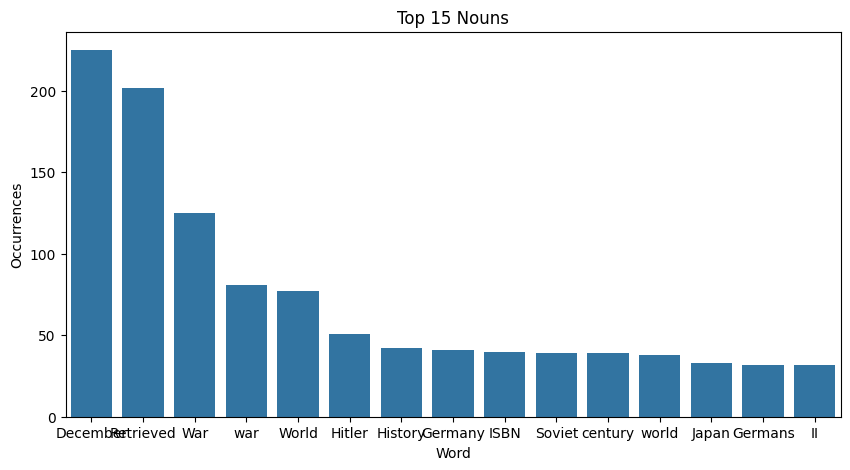

In [22]:
# Nouns Bar Plot
noun_df = pos_df[pos_df['pos'].isin(noun_tags)]
noun_counts = noun_df['word'].value_counts().nlargest(15).reset_index()
noun_counts.columns = ['Word', 'Occurrences']
plt.figure(figsize=(10, 5))
sns.barplot(data=noun_counts, x='Word', y='Occurrences').set_title("Top 15 Nouns")

Text(0.5, 1.0, 'Top 15 Verbs')

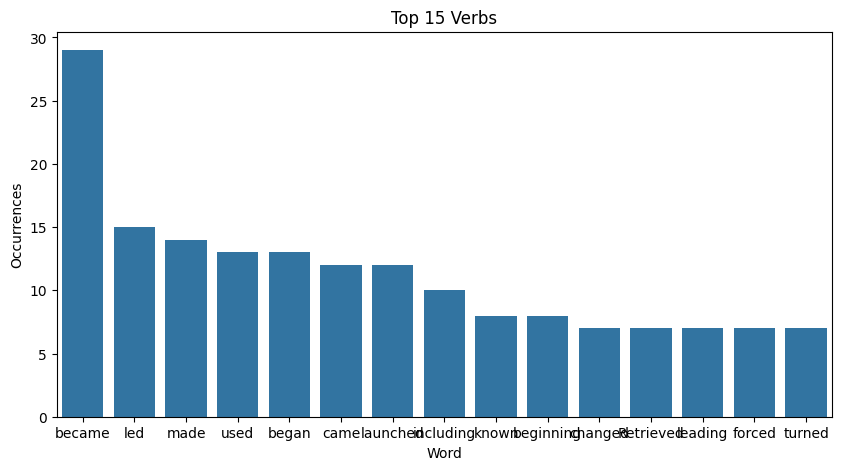

In [24]:
# Verbs Bar Plot
verb_df = pos_df[pos_df['pos'].isin(verb_tags)]
verb_counts = verb_df['word'].value_counts().nlargest(15).reset_index()
verb_counts.columns = ['Word', 'Occurrences']
plt.figure(figsize=(10, 5))
sns.barplot(data=verb_counts, x='Word', y='Occurrences').set_title("Top 15 Verbs")

Text(0.5, 1.0, 'Top 15 Adjectives')

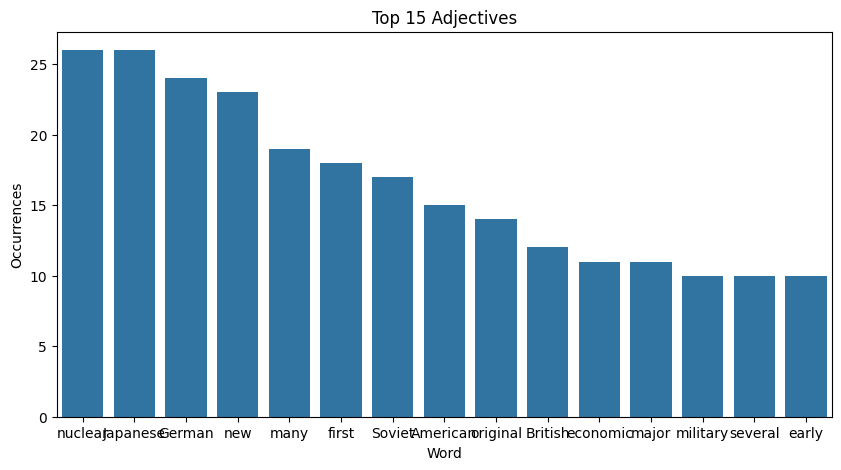

In [26]:
# Adjectives Bar Plot
adj_df = pos_df[pos_df['pos'].isin(adj_tags)]
adj_counts = adj_df['word'].value_counts().nlargest(15).reset_index()
adj_counts.columns = ['Word', 'Occurrences']
plt.figure(figsize=(10, 5))
sns.barplot(data=adj_counts, x='Word', y='Occurrences').set_title("Top 15 Adjectives")

In [28]:
# Analyze Mentions of Countries in the Text
countries = ["United States", "Germany", "France", "Russia", "China", "Japan", "United Kingdom", "Italy", "India", "Canada"]
country_mentions = {country: raw_text.count(country) for country in countries}
df_countries = pd.DataFrame(list(country_mentions.items()), columns=["Country", "Mentions"])
df_countries_sorted = df_countries.sort_values("Mentions", ascending=False)

Text(0.5, 1.0, 'Country Mentions in 20th Century Events')

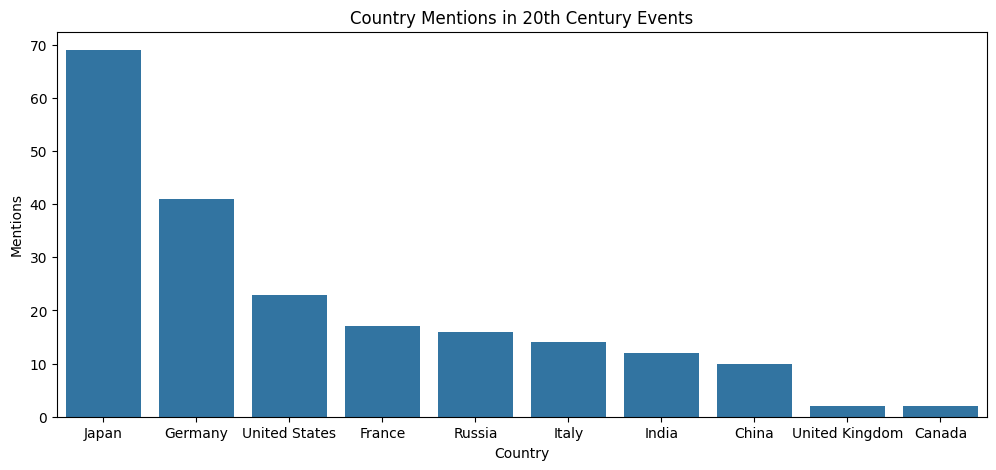

In [30]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df_countries_sorted, x="Country", y="Mentions").set_title("Country Mentions in 20th Century Events")

### Analysis of Country Mentions in the Text

The plot shows that countries like the **United States**, **Germany**, **Russia**, and the **Japan** are mentioned far more frequently than others. This aligns with their significant roles in major global events throughout the 20th century, such as both World Wars, the Cold War, and numerous international conflicts and treaties.

Notably, **emerging nations** like **India** and **China** also appear, reflecting their involvement in key independence movements, revolutions, or wars.

Overall, the distribution highlights how historical narratives emphasize global powers and flashpoints of geopolitical change.
